In [ ]:
data_url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-05-28/winemag-data-130k-v2.csv"

In [ ]:
import pandas as pd

In [ ]:
data_df = pd.read_csv(data_url, sep=",")

In [ ]:
data_df.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [ ]:
data_df["points"].mean()

88.44713820775404

In [ ]:
data_df["price"].mean()

35.363389129985535

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_countries = data_df["country"].value_counts().head(10)

In [ ]:
df_countries["other"] = 5387

In [ ]:
df_countries

US           54504
France       22093
Italy        19540
Spain         6645
Portugal      5691
Chile         4472
Argentina     3800
Austria       3345
Australia     2329
Germany       2165
other         5387
Name: country, dtype: int64

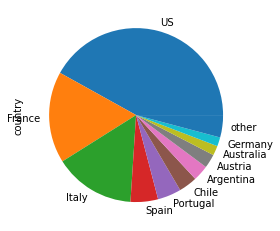

In [ ]:
df_countries.plot.pie();

In [ ]:
import numpy as np

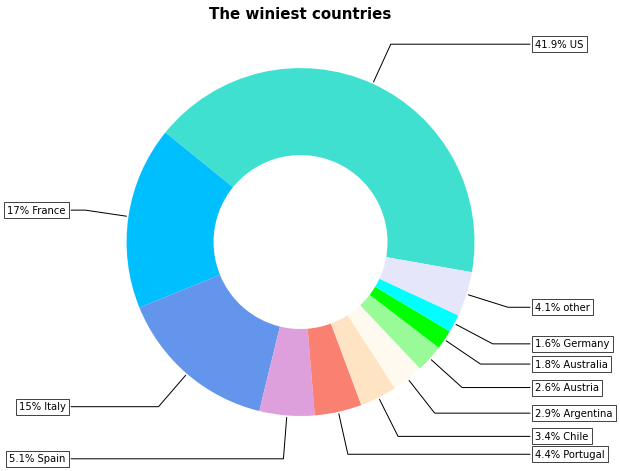

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

recipe = ["41.9% US", "17% France", "15% Italy", "5.1% Spain", "4.4% Portugal", 
          "3.4% Chile", "2.9% Argentina", "2.6% Austria", "1.8% Australia", 
          "1.6% Germany", "4.1% other"]

data = df_countries

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-10, 
                       colors = ["turquoise", "deepskyblue", "cornflowerblue", 
                                 "plum", "salmon", "bisque", "floralwhite", 
                                 "palegreen", "lime", "cyan", "lavender"])

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.25*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("The winiest countries", color = 'black', size = 15, 
             weight = 'bold')

plt.show()

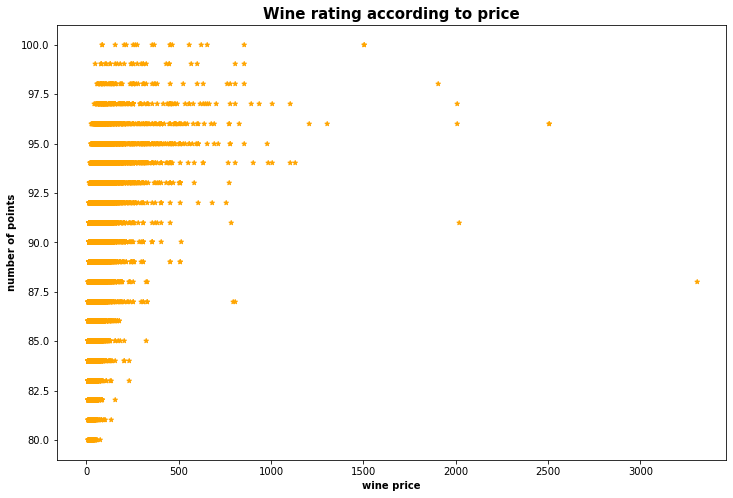

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
X = data_df["price"]
Y = data_df["points"]
plt.scatter(X, Y, color="orange", marker=r'$\star$')
plt.xlabel("wine price", weight = 'bold', size = 10)
plt.ylabel("number of points", weight = 'bold', size = 10)
ax.set_title("Wine rating according to price", color = 'black', size = 15, 
             weight = 'bold')
plt.show();

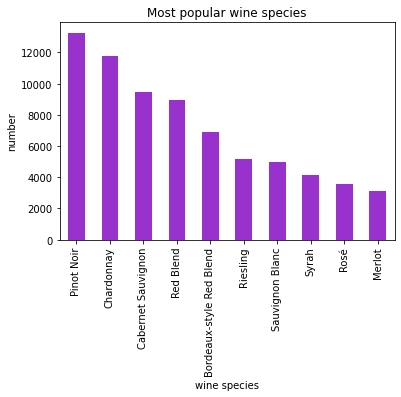

In [ ]:
data_variety = data_df["variety"].value_counts().head(10)
fig, ax = plt.subplots()
data_variety.plot.bar(
    title="Most popular wine species",
    xlabel="wine species",
    ylabel="number",
    color = "darkorchid"
);

In [ ]:
df5 = data_df.groupby("variety").agg({"points": "mean"}).sort_values(by="points", ascending=False)
df5.head(10)

,points
variety,
Terrantez,95.000000
Tinta del Pais,95.000000
Gelber Traminer,95.000000
Bual,94.142857
Sercial,94.000000
Riesling-Chardonnay,94.000000
Ramisco,93.000000
Garnacha-Cariñena,93.000000
Blauburgunder,93.000000


In [ ]:
data_variety

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Riesling                     5189
Sauvignon Blanc              4967
Syrah                        4142
Rosé                         3564
Merlot                       3102
Name: variety, dtype: int64

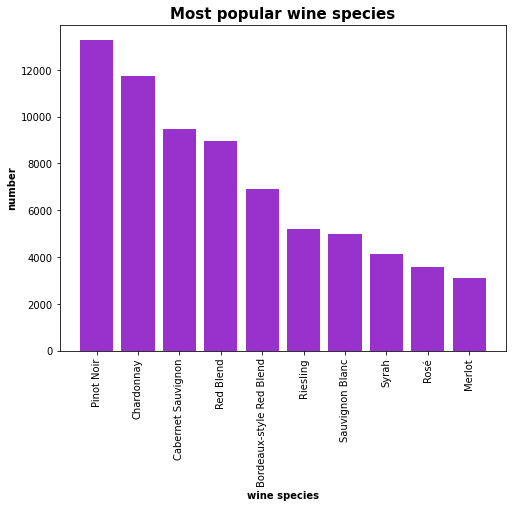

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
X = ["Pinot Noir", "Chardonnay", "Cabernet Sauvignon", "Red Blend", 
     "Bordeaux-style Red Blend", "Riesling", "Sauvignon Blanc", "Syrah", "Rosé",
     "Merlot"]
Y = [13272, 11753, 9472, 8946, 6915, 5189, 4967, 4142, 3564, 3102]

plt.bar(X, Y, color="darkorchid")

ax.set_title('Most popular wine species', size = 15, weight = "bold")
plt.xlabel('wine species', size = 10, weight = "bold")
plt.ylabel('number', size = 10, weight = "bold")
plt.xticks(rotation=90)
plt.show();

In [ ]:
import re

In [ ]:
def get_year(x):
    if type(x) == str:
        res = re.findall("[0-9]{4}", x)
        if res:
            if int(res[0]) < 2000:
                return int(res[0])
            else:
                return None
    return None

In [ ]:
data_df1 = data_df
data_df1["title"] = data_df1["title"].apply(get_year)

In [ ]:
data_df1["title"].head(10)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: title, dtype: float64

In [ ]:
data_df2 = data_df1["title"].value_counts().sort_index()
data_df2.head(10)

1000.0    2
1070.0    1
1150.0    2
1492.0    6
1503.0    1
1607.0    1
1621.0    1
1637.0    2
1752.0    1
1789.0    1
Name: title, dtype: int64

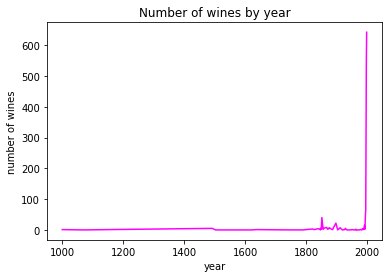

In [ ]:
data_df1["title"].value_counts().sort_index().plot(
    title="Number of wines by year", 
    xlabel="year",
    ylabel="number of wines",
    color = "magenta"
);

In [ ]:
def get_price(x):
    resu = 0
    if type(x) == float:
        if x > 1000:
            resu = 1000
        elif x > 500:
            resu = 500
        elif x > 100:
            resu = 100
        else:
            resu = 10
        if resu:
            return resu
    return None

In [ ]:
data_df1 = data_df
data_df1["price"] = data_df1["price"].apply(get_price)
data_df1["price"].head(5)

0    10
1    10
2    10
3    10
4    10
Name: price, dtype: int64

In [ ]:
def points(x):
    resu = 0
    if type(x) == int:
        if x > 98:
            resu = 98
        elif x > 95:
            resu = 95
        elif x > 90:
            resu = 90
        else:
            resu = 80
        if resu:
            return resu
    return None

In [ ]:
data_df1["points"] = data_df1["points"].apply(points)
data_df1["points"].head(5)

0    80
1    80
2    80
3    80
4    80
Name: points, dtype: int64

In [ ]:
data_df1["price"].value_counts()

10      126605
100       3275
500         77
1000        14
Name: price, dtype: int64

In [ ]:
df4 = data_df1.groupby(["price", "points"], as_index=False).agg({"points": "sum"})

In [ ]:
df3 = data_df1.groupby(["country", "price"], as_index=False).agg({"points": "mean"})
df3.head(5)

,country,price,points
0,Argentina,10,86.593439
1,Argentina,100,92.074074
2,Armenia,10,87.500000
3,Australia,10,88.398032
4,Australia,100,92.831461


In [ ]:
df2 = data_df1.pivot_table(index="country", columns="price", values="points")
df2.head(5)

price,10,100,500,1000
country,,,,
Argentina,86.593439,92.074074,NaN,NaN
Armenia,87.500000,NaN,NaN,NaN
Australia,88.398032,92.831461,96.0,NaN
Austria,90.076715,94.000000,NaN,94.0
Bosnia and Herzegovina,86.500000,NaN,NaN,NaN


In [ ]:
import seaborn as sns

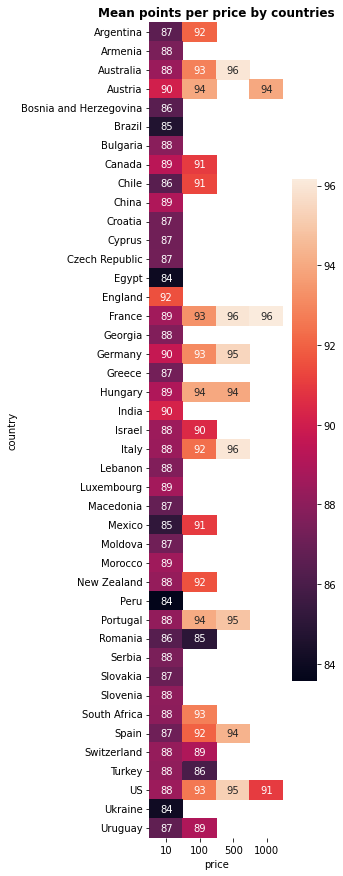

In [ ]:
fig, ax = plt.subplots(figsize=(3,15)) 
sns.heatmap(df2, annot=True, ax = ax)
plt.title("Mean points per price by countries", weight = "bold");

In [ ]:
df_yummy = data_df.groupby("country").agg({"points": "mean"}).sort_values(by="points", ascending=False)
df_yummy.head(10)

,points
country,
England,91.581081
India,90.222222
Austria,90.101345
Germany,89.851732
Canada,89.369650
Hungary,89.191781
China,89.000000
France,88.845109
Luxembourg,88.666667


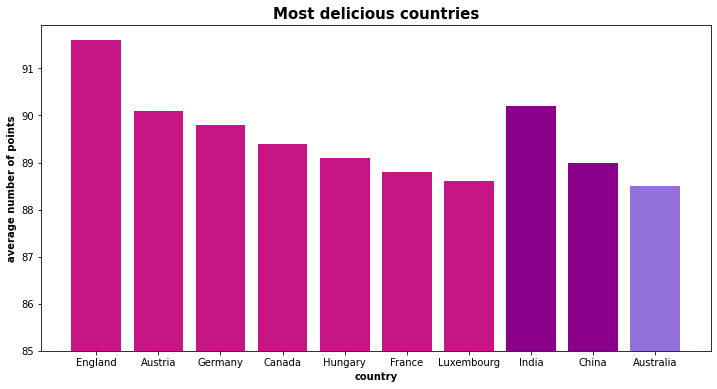

In [ ]:
f, ax = plt.subplots(figsize=(12, 6))
X = ["England", "Austria", "Germany", "Canada", "Hungary", 
     "France", "Luxembourg"]
X2 = ["India", "China"]
X3 = ["Australia"]
Y = [6.6, 5.1, 4.8, 4.4, 4.1, 3.8, 3.6]
Y2 = [5.2, 4.0]
Y3 = [3.5]
plt.bar(X, Y, color="mediumvioletred", bottom = 85)
plt.bar(X2, Y2, color='darkmagenta', bottom = 85)
plt.bar(X3, Y3, color='mediumpurple', bottom = 85)
ax.set_title('Most delicious countries', size = 15, weight = "bold")
plt.xlabel('country', size = 10, weight = "bold")
plt.ylabel('average number of points', size = 10, weight = "bold")
plt.show()

In [ ]:
countries = ["England", "India", "Austria", "Germany", "Canada", "Hungary", 
             "China", "France", "Luxembourg", "Australia"]
def country_top(x):
    if type(x) == str:
        if x in countries:
            return "top"
    return None

In [ ]:
df_violin = data_df
df_violin["top"] = df_violin["country"].apply(country_top)
df_violin = df_violin[df_violin["top"] == "top"]
df_violin.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,top
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,10,Alsace,Alsace,NaN,Roger Voss,@vossroger,NaN,Gewürztraminer,Trimbach,top
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,10,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,NaN,Gewürztraminer,Heinz Eifel,top
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,10,Alsace,Alsace,NaN,Roger Voss,@vossroger,NaN,Pinot Gris,Jean-Baptiste Adam,top


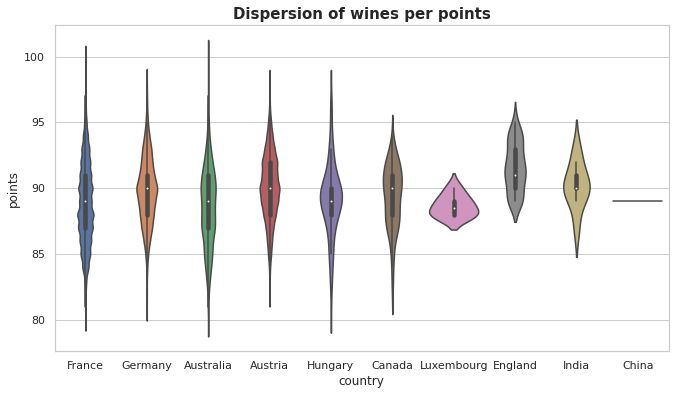

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(11, 6))
ax.set_title("Dispersion of wines per points", size = 15, weight = "bold")
ax = sns.violinplot(x=df_violin["country"], y=data_df["points"])

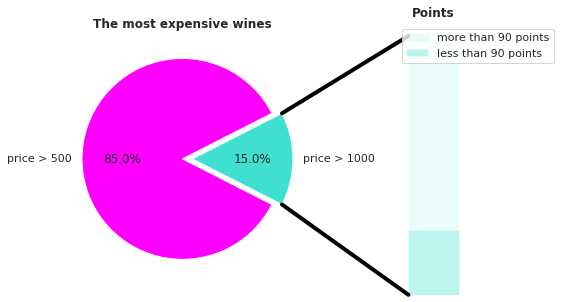

In [ ]:
from matplotlib.patches import ConnectionPatch
import numpy as np

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [.15, 0.85]
labels = ['price > 1000', 'price > 500']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode, colors = ["turquoise", "fuchsia"])
ax1.set_title('The most expensive wines', weight = "bold", loc = "center")

# bar chart parameters
age_ratios = [.25, .75]
age_labels = ['less than 90 points', 'more than 90 points']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='turquoise', 
                 label=label, alpha=0.1 + 0.25 * j)

ax2.set_title('Points', weight = "bold", loc = "center")
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

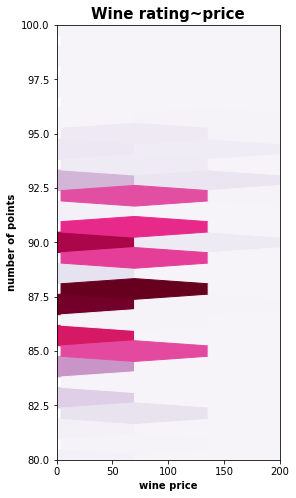

In [ ]:
# make data: correlated + noise
x = data_df["price"]
y = data_df["points"]

# plot:
fig, ax = plt.subplots(figsize = (4,8))

ax.hexbin(x, y, gridsize=25, cmap="PuRd")

ax.set(xlim=(0, 200), ylim=(80, 100))

ax.set_title("Wine rating~price", size = 15, weight = "bold")
plt.xlabel("wine price", weight = 'bold', size = 10)
plt.ylabel("number of points", weight = 'bold', size = 10)

plt.show()